- HOW TO COUNT A RETENTION RATE BY COHORT ANALYSIS

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


In [4]:
# create a cohort as a min active date
mindate = df.sort_values('date').drop_duplicates('device_id')

In [5]:
mindate = mindate[['device_id','date']]

In [6]:
df = df.merge(mindate, how = 'left', on = 'device_id')

In [7]:
df = df.rename(columns = {'date_x': 'date', 'date_y': 'cohort'})

In [8]:
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,cohort
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01


In [14]:
df.dtypes

date             object
event            object
purchase_sum    float64
os_name          object
device_id         int64
gender           object
city             object
utm_source       object
cohort           object
dtype: object

In [17]:
df['date'] = df['date'].astype('datetime64[W]')
df['cohort'] = df['cohort'].astype('datetime64[W]')

In [18]:
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,cohort
0,2019-12-26,app_start,NaN,android,669460,female,Moscow,-,2019-12-26
1,2019-12-26,app_start,NaN,ios,833621,male,Moscow,vk_ads,2019-12-26
2,2019-12-26,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2019-12-26
3,2019-12-26,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2019-12-26
4,2019-12-26,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2019-12-26
...,...,...,...,...,...,...,...,...,...
2747963,2020-03-26,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-26
2747964,2020-03-26,register,NaN,ios,27301864,male,Moscow,-,2020-03-26
2747965,2020-03-26,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-26
2747966,2020-03-26,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-05


In [28]:
df['cohort_lifetime'] = df['date'] - df['cohort']
df['cohort_lifetime'] = df['cohort_lifetime'] / np.timedelta64(1, 'W')
df['cohort_lifetime'] = df['cohort_lifetime'].round().astype(int)

In [29]:
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,cohort,cohort_lifetime
0,2019-12-26,app_start,NaN,android,669460,female,Moscow,-,2019-12-26,0
1,2019-12-26,app_start,NaN,ios,833621,male,Moscow,vk_ads,2019-12-26,0
2,2019-12-26,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2019-12-26,0
3,2019-12-26,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2019-12-26,0
4,2019-12-26,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2019-12-26,0
...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-26,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-26,0
2747964,2020-03-26,register,NaN,ios,27301864,male,Moscow,-,2020-03-26,0
2747965,2020-03-26,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-26,0
2747966,2020-03-26,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-05,3


In [30]:
cohorts = df.groupby(['cohort','cohort_lifetime']).agg({'device_id':'nunique'}).reset_index() 
cohorts

,cohort,cohort_lifetime,device_id
0,2019-12-26,0,4445
1,2019-12-26,1,2332
2,2019-12-26,2,2311
3,2019-12-26,3,2068
4,2019-12-26,4,1963
...,...,...,...
100,2020-03-12,1,686
101,2020-03-12,2,408
102,2020-03-19,0,13055
103,2020-03-19,1,1060


In [31]:
# count customers in each cohort
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['cohort','device_id']]
initial_users_count = initial_users_count.rename(columns={'device_id':'cohort_users'})

In [32]:
cohorts = cohorts.merge(initial_users_count, on='cohort')
cohorts

,cohort,cohort_lifetime,device_id,cohort_users
0,2019-12-26,0,4445,4445
1,2019-12-26,1,2332,4445
2,2019-12-26,2,2311,4445
3,2019-12-26,3,2068,4445
4,2019-12-26,4,1963,4445
...,...,...,...,...
100,2020-03-12,1,686,5078
101,2020-03-12,2,408,5078
102,2020-03-19,0,13055,13055
103,2020-03-19,1,1060,13055


In [33]:
# Retention rate
cohorts['retention'] = cohorts['device_id']/cohorts['cohort_users']

In [38]:
# create pivot table
retention_pivot = cohorts.pivot_table(index='cohort',columns='cohort_lifetime',
                                      values='retention',aggfunc='sum')
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort,,,,,,,,,,,,,,
2019-12-26,1.0,0.524634,0.51991,0.465242,0.44162,0.410124,0.383127,0.391676,0.386727,0.341732,0.360405,0.329134,0.332733,0.305512
2020-01-02,1.0,0.439542,0.363868,0.34719,0.309913,0.289253,0.300081,0.294107,0.254652,0.273446,0.244197,0.244508,0.210218,
2020-01-09,1.0,0.187127,0.155867,0.119682,0.105158,0.119043,0.112796,0.0817183,0.105591,0.0771353,0.0741256,0.0605363,,
2020-01-16,1.0,0.167851,0.121258,0.100451,0.118456,0.102683,0.0722773,0.0945883,0.0629378,0.0643387,0.0498625,,,
2020-01-23,1.0,0.161164,0.121313,0.144853,0.129322,0.0835124,0.123559,0.0744286,0.0746239,0.0578238,,,,
2020-01-30,1.0,0.149345,0.151517,0.125377,0.0881632,0.110169,0.0742869,0.0763193,0.0569767,,,,,
2020-02-06,1.0,0.184346,0.146931,0.0972798,0.123167,0.0813025,0.0815047,0.0599656,,,,,,
2020-02-13,1.0,0.141476,0.0860832,0.129499,0.0669328,0.0661843,0.0500904,,,,,,,
2020-02-20,1.0,0.115452,0.142186,0.0826479,0.0791226,0.059244,,,,,,,,


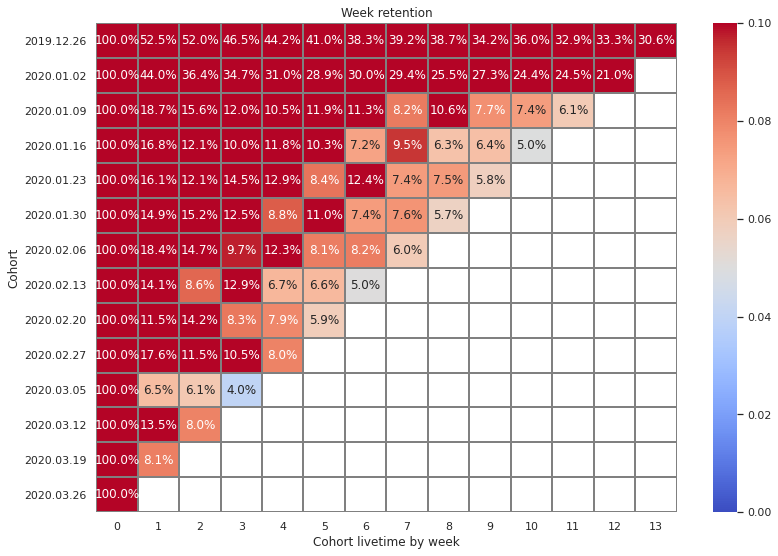

In [42]:
# create a visualisation
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Week retention')
plot = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.1, 
            cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'))
plot.set_xlabel('Cohort livetime by week')
plot.set_ylabel('Cohort')
plt.show()